### Importação das bibliotecas iniciais
Para iniciar o trabalho, são importadas bibliotecas úteis no decorrer do algoritmo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Importação e tratamento inicial do dataset
Iniciamos fazendo a importação dos dados a serem trabalhados e realizando o primeiro tratamento, focado em converter variáveis categórias em numéricas.

In [ ]:
colunas = ['sex', 'age', 'address', 'Pstatus','Medu','Fedu','famsize',
           'traveltime', 'studytime','failures','schoolsup', 'famsup',
           'activities','paid','internet','higher','romantic','freetime','goout',
           'health', 'absences', 'G1', 'G2', 'G3']
notas_port = pd.read_excel("student-por.xlsx", usecols = colunas)
pd.set_option('display.max_columns', None)

Agora convertemos para numéricas as variáveis categóricas.

In [ ]:
label_sex = {'F': 0,
              'M': 1,
              }
notas_port['sex'] = notas_port['sex'].map(label_sex)

label_address = {'U' : 0,
                 'R' : 1,
                }

notas_port['address'] = notas_port['address'].map(label_address)

label_fam = {'GT3' : 0,
             'LE3' : 1,
}

notas_port['famsize'] = notas_port['famsize'].map(label_fam)

label_pstatus = {'T' : 0,
                 'A' : 1,
}

notas_port['Pstatus'] = notas_port['Pstatus'].map(label_pstatus)

label_various = {'no' : 0,
                 'yes' : 1,
                 }

colunas_2 = ['schoolsup','famsup','paid','activities','higher','internet','romantic']
for coluna in colunas_2:
  notas_port[coluna] = notas_port[coluna].map(label_various)

In [ ]:
notas_port.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2,G3
0,0,18,0,0,1,4,4,2,2,0,1,0,0,0,1,0,0,3,4,3,4,0,11,11
1,0,17,0,0,0,1,1,1,2,0,0,1,0,0,1,1,0,3,3,3,2,9,11,11
2,0,15,0,1,0,1,1,1,2,0,1,0,0,0,1,1,0,3,2,3,6,12,13,12
3,0,15,0,0,0,4,2,1,3,0,0,1,0,1,1,1,1,2,2,5,0,14,14,14
4,0,16,0,0,0,3,3,1,2,0,0,1,0,0,1,0,0,3,2,5,0,11,13,13


###Tratamento dos dados
É verificada a presença de outliers e feito seu tratamento. Além disso, vemos quais são as variáveis mais correlacionadas à variável de classificação.

In [ ]:
notas_port.describe()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.409861,16.744222,0.303544,0.295840,0.123267,2.514638,2.306626,1.568567,1.930663,0.221880,0.104777,0.613251,0.060092,0.485362,0.893683,0.767334,0.368259,3.180277,3.184900,3.536210,3.659476,11.399076,11.570108,11.906009
std,0.492187,1.218138,0.460143,0.456771,0.328996,1.134552,1.099931,0.748660,0.829510,0.593235,0.306502,0.487381,0.237841,0.500171,0.308481,0.422857,0.482704,1.051093,1.175766,1.446259,4.640759,2.745265,2.913639,3.230656
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,0.000000,17.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,3.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,1.000000,18.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


É feito o boxplot das variáveis numéricas não binárias.

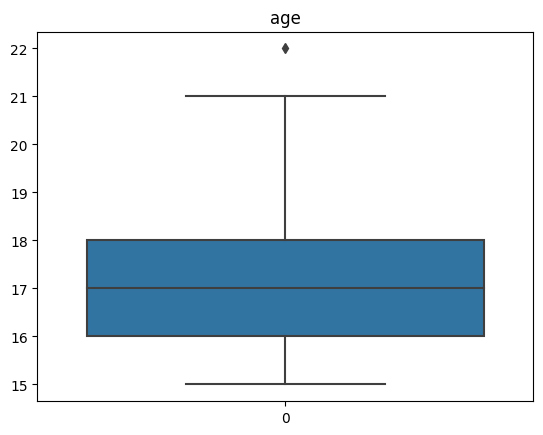

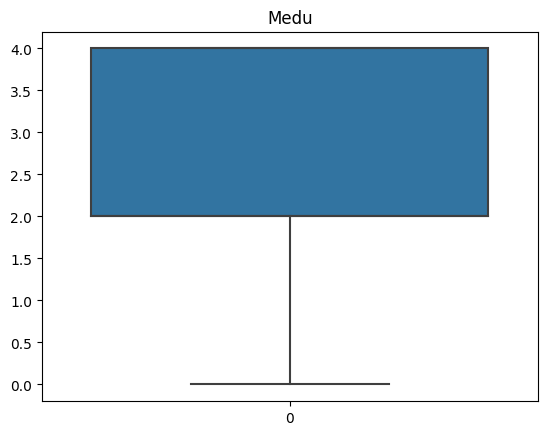

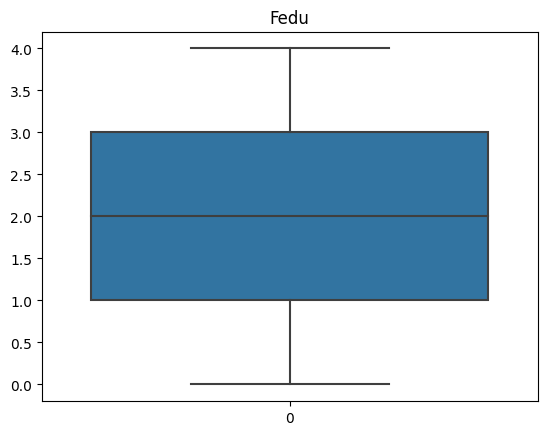

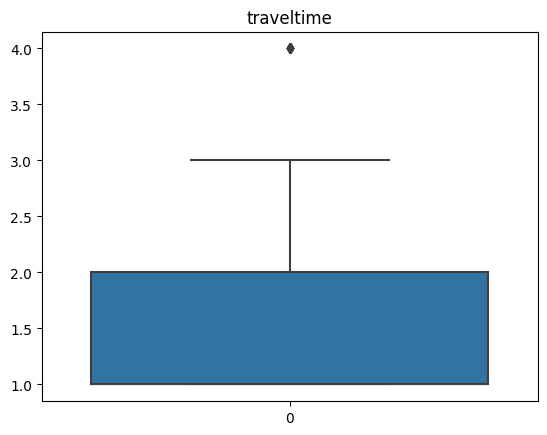

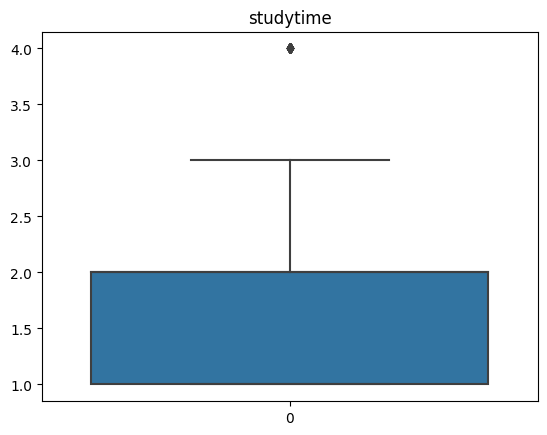

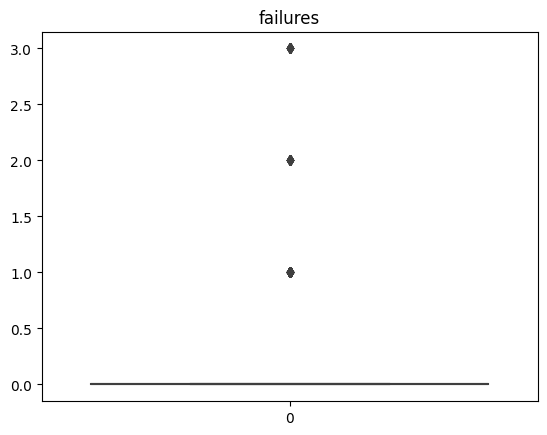

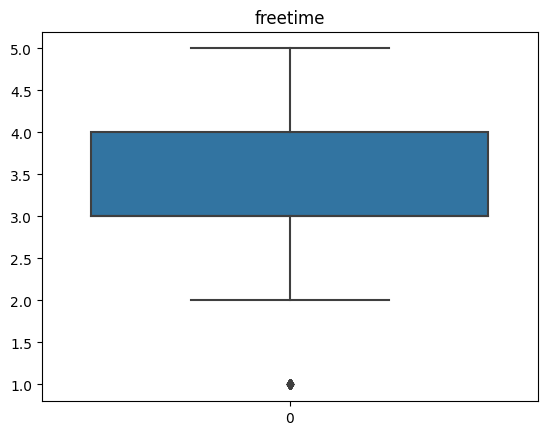

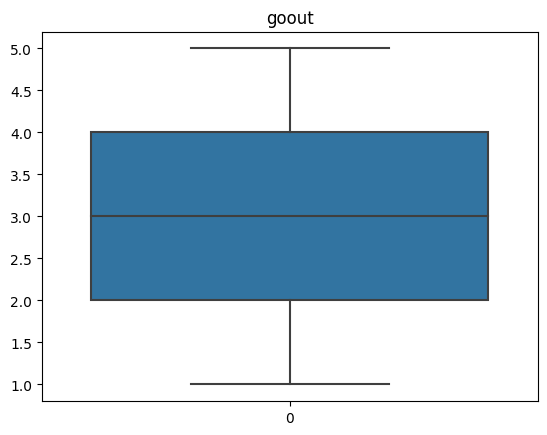

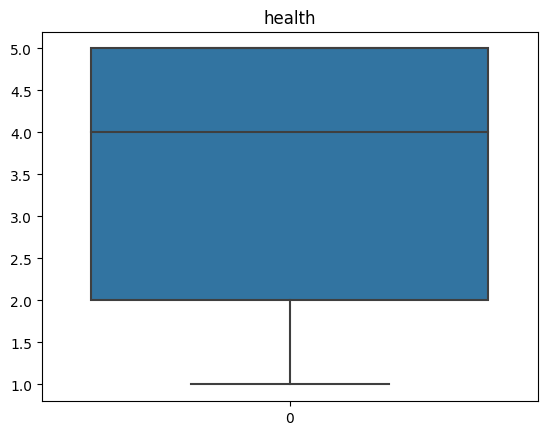

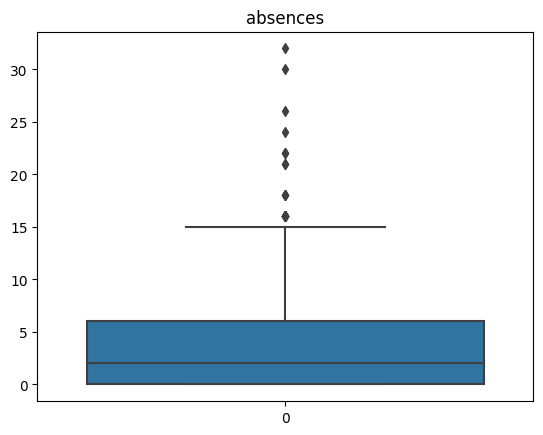

In [ ]:
colunas_mat = notas_port[['age', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures','freetime', 'goout',
       'health', 'absences']]
for column in colunas_mat:
    sns.boxplot(data = colunas_mat[column])
    plt.title(column)
    plt.show()

Encontradas as colunas com outliers, as mesmas serão tratadas.

In [ ]:
outliers = [['traveltime', 'studytime', 'failures',  'freetime','absences']]

# Loop pelas colunas selecionadas removendo outliers
for column in outliers:
    Q1 = notas_port[column].quantile(0.25)
    Q3 = notas_port[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = notas_port[(notas_port[column] >= lower_bound) & (notas_port[column] <= upper_bound)]#Dataset contendo as colunas com outliers removidos


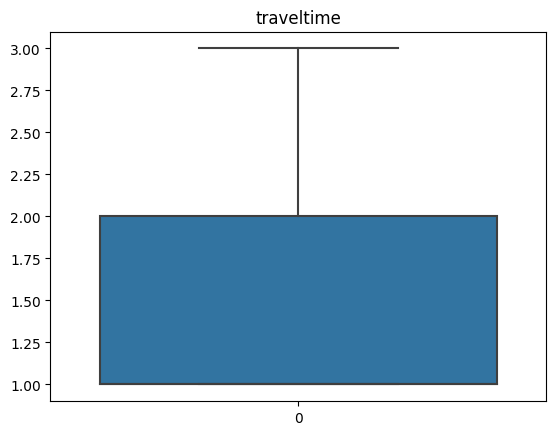

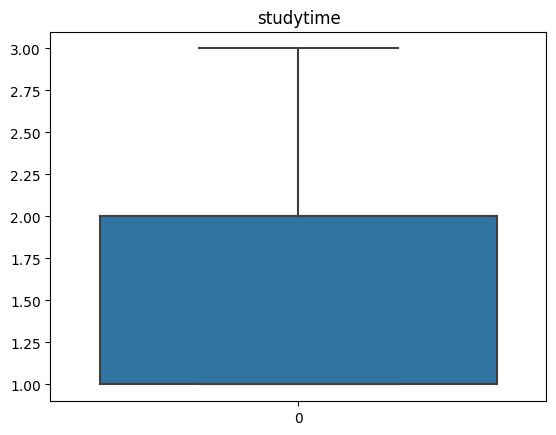

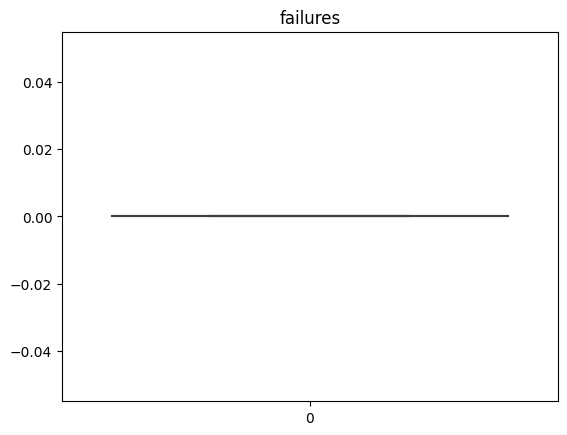

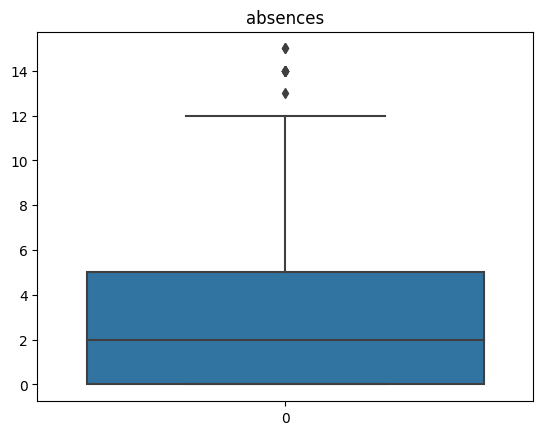

In [ ]:
colunas = df[['traveltime', 'studytime', 'failures','absences']]
for column in colunas:
    sns.boxplot(data = df[column])
    plt.title(column)
    plt.show()


Em seguida, atualizamos o valor das colunas tratadas, passando do dataframe df para o dataframe notas_port.

In [ ]:
colunas_atualizacao = ['traveltime', 'studytime', 'failures','absences']
for coluna in colunas_atualizacao:
  df[coluna] = notas_port[coluna]

Também preencheremos as colunas cujos outliers foram removidos com os valores de média de cada uma das colunas.

In [ ]:
for colunas in colunas_atualizacao:
  notas_port[coluna] = notas_port[coluna].fillna(notas_port[coluna].mean())

In [ ]:
notas_port.describe()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.409861,16.744222,0.303544,0.295840,0.123267,2.514638,2.306626,1.568567,1.930663,0.221880,0.104777,0.613251,0.060092,0.485362,0.893683,0.767334,0.368259,3.180277,3.184900,3.536210,3.659476,11.399076,11.570108,11.906009
std,0.492187,1.218138,0.460143,0.456771,0.328996,1.134552,1.099931,0.748660,0.829510,0.593235,0.306502,0.487381,0.237841,0.500171,0.308481,0.422857,0.482704,1.051093,1.175766,1.446259,4.640759,2.745265,2.913639,3.230656
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,0.000000,17.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,3.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,1.000000,18.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Em seguida, plotamos o mapa de correlação para verificar as variáveis mais correlacionadas com G3.

<Axes: >

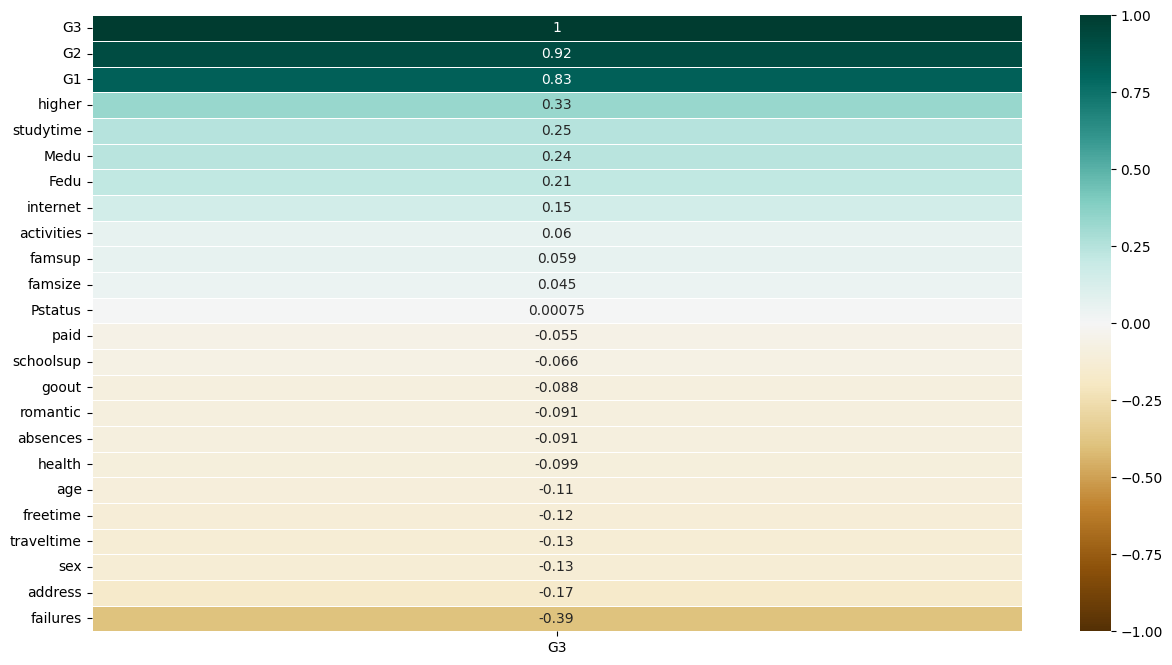

In [ ]:
plt.figure(figsize=(15,8))

sns.heatmap(notas_port.corr()[['G3']].sort_values(by='G3', ascending=False),cmap='BrBG', vmin=-1, vmax= 1 , center=0, annot=True,linewidth=.5,square=False)

Vemos que as notas G1 e G2 são as variáveis mais correlacionadas com a nota G3.

###Modelagem e predição
Faremos agora a regressão para obter os valores da nota G3 e compará-los com os valores reais.
Faremos a normalização dos dados antes da predição.

In [ ]:
notas_features = notas_port.drop(['G3'],1)

<ipython-input-13-6296adfc3b74>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  notas_features = notas_port.drop(['G3'],1)


Criamos na célula acima um dataframe sem a coluna G3, que são as notas que queremos prever. Agora fazemos a normalização dos dados das colunas restantes.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Aplicar o MinMaxScaler ao DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(notas_features), columns = notas_features.columns)
notas_features = df_scaled

Partimos para a predição, verificando ao fim a acurácia e o erro médio absoluto (MAE)

In [ ]:
predict='G3'
X=np.array(notas_features)
y=np.array(notas_port[predict])

In [ ]:
np.random.seed(1)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.35, shuffle = True)

In [ ]:
linear = LinearRegression().fit(X_train, y_train)
accuracy=linear.score(X_test,y_test)
print(accuracy)

0.81127860524337


In [ ]:
y_pred = linear.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test,y_pred)
print(MAE)

0.8961180607651857


###Construção do dataframe de conclusão
Obtemos aproximadamente 81.12% de acurácia na predição das notas de G3 e um MAE de 0,89. Por fim, criaremos um dataframe contendo os valores reais, os previstos, a diferença entre estes e duas colunas referentes à necessidade de acompanhamento.

In [ ]:
# Criação do DataFrame
resumo = pd.DataFrame({
    'Valores reais': y_test,
    'Valores previstos': y_pred,
})

# Coluna com a diferença da nota real para a nota prevista
resumo['Diferença'] = abs(resumo['Valores reais'] - resumo['Valores previstos'])

# Adição da coluna de acompanhamento com base na nota prevista e no MAE
resumo['Acompanhamento_previsão'] = (resumo['Valores previstos'] < 10) & (resumo['Diferença'] >= 0.89)

# Substituição os valores booleanos por strings
resumo['Acompanhamento_previsão'] = resumo['Acompanhamento_previsão'].replace({True: 'Indica-se acompanhamento', False: 'Não indicado acompanhamento'})

#Adição de coluna para verificar notas reais que precisariam de acompanhamento seguindo a penas o critério de notas abaixo de 10
resumo['Acompanhamento_real'] = resumo['Valores reais'] < 10

# Substituição os valores booleanos por strings
resumo['Acompanhamento_real'] = resumo['Acompanhamento_real'].replace({True: 'Indica-se acompanhamento', False: 'Não indicado acompanhamento'})

#Exibição do dataframe
pd.set_option('display.max_rows', None)
resumo

,Valores reais,Valores previstos,Diferença,Acompanhamento_previsão,Acompanhamento_real
0,0,1.405981,1.405981,Indica-se acompanhamento,Indica-se acompanhamento
1,11,10.550100,0.449900,Não indicado acompanhamento,Não indicado acompanhamento
2,8,8.591195,0.591195,Não indicado acompanhamento,Indica-se acompanhamento
3,8,7.728173,0.271827,Não indicado acompanhamento,Indica-se acompanhamento
4,11,11.275972,0.275972,Não indicado acompanhamento,Não indicado acompanhamento
5,11,11.106547,0.106547,Não indicado acompanhamento,Não indicado acompanhamento
6,15,14.624684,0.375316,Não indicado acompanhamento,Não indicado acompanhamento
7,13,12.820160,0.179840,Não indicado acompanhamento,Não indicado acompanhamento
8,16,15.679347,0.320653,Não indicado acompanhamento,Não indicado acompanhamento
9,14,14.454924,0.454924,Não indicado acompanhamento,Não indicado acompanhamento


Vamos ver quantos dos alunos precisam de acompanhamento.

In [ ]:
len(X_test)

228

In [ ]:
resumo['Acompanhamento_previsão'].value_counts()

Não indicado acompanhamento    202
Indica-se acompanhamento        26
Name: Acompanhamento_previsão, dtype: int64

Dos 228 alunos separados para teste, o acompanhamento é indicado na previsão para 26. Vamos comparar com os valores de G3 reais.

In [ ]:
resumo['Acompanhamento_real']. value_counts()

Não indicado acompanhamento    195
Indica-se acompanhamento        33
Name: Acompanhamento_real, dtype: int64

Temos 33 indicações de acompanhamento reais, logo 7 alunos que precisam de acompanhamento não foram contemplados na previsão.

In [ ]:
igual = 0
diferente = 0

for i in range(len(resumo['Acompanhamento_previsão'])):
    if resumo['Acompanhamento_previsão'][i] == resumo['Acompanhamento_real'][i]:
        igual += 1
    else:
        diferente += 1

print("Valores iguais:", igual)
print("Valores diferentes:", diferente)

Valores iguais: 201
Valores diferentes: 27


A previsão e a indicação real de acompanhamento coincidem em 201 casos e diferem em 27. Sendo assim, com a lógica proposta, alcançamos uma acurácia de 88,15% na indicação de acompanhamento para os estudantes.